In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import time

In [11]:
def gradient(x,delta):
    grad=np.zeros(2)
    grad[0]=(f([x[0]+delta,x[1]])- f([x[0]-delta,x[1]]))/(2*delta)
    grad[1]=(f([x[0],x[1]+delta])- f([x[0],x[1]-delta]))/(2*delta)
    return grad

def Hessian(x,delta):
    H=np.zeros([2,2])
    H[0,0]= (f([x[0]+delta,x[1]]) - 2*f([x[0],x[1]]) +  f([x[0]-delta,x[1]]))/(delta**2)
    H[1,1]= (f([x[0],x[1]+delta]) - 2*f([x[0],x[1]]) +  f([x[0],x[1]-delta]))/(delta**2)
    H[0,1]= (f([x[0]+delta,x[1]+delta]) - f([x[0]+delta,x[1]-delta]) - f([x[0]-delta,x[1]+delta]) +  f([x[0]-delta,x[1]-delta]))/(4*delta**2)
    H[1,0]= H[0,1]
    return H

In [12]:
def f(x):
    k1 = 100   
    k2 = 90     
    Fx1,Fx2 = 20,40
    x1 = x[0]
    x2 = x[1]
    ans = k1*(np.sqrt(x1**2+(x2+1)**2)-1)**2 + k2*(np.sqrt(x1**2+(x2+1)**2)-1)**2 - (Fx1*x1+Fx2*x2)
    return ans

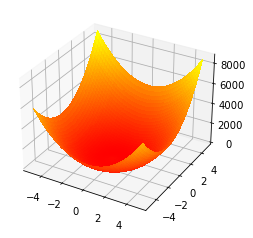

In [13]:
X1 = np.arange(-5, 5, 0.01)
X2 = np.arange(-5, 5, 0.01)
x1, x2 = np.meshgrid(X1, X2)
z = f([x1,x2])
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(x1, x2, z, cmap=cm.autumn, linewidth=0, antialiased = False)
plt.show()

In [19]:
delta = 0.001
epsilon1 = 0.001
labda = 100
x= [4,4]
x_prev=x
fx_prev=f(x)
iteracciones=0

Tiempo = 6.350343942642212
[ 5.00175856e-01 -4.63138766e-04]
5
-7.352935819037192


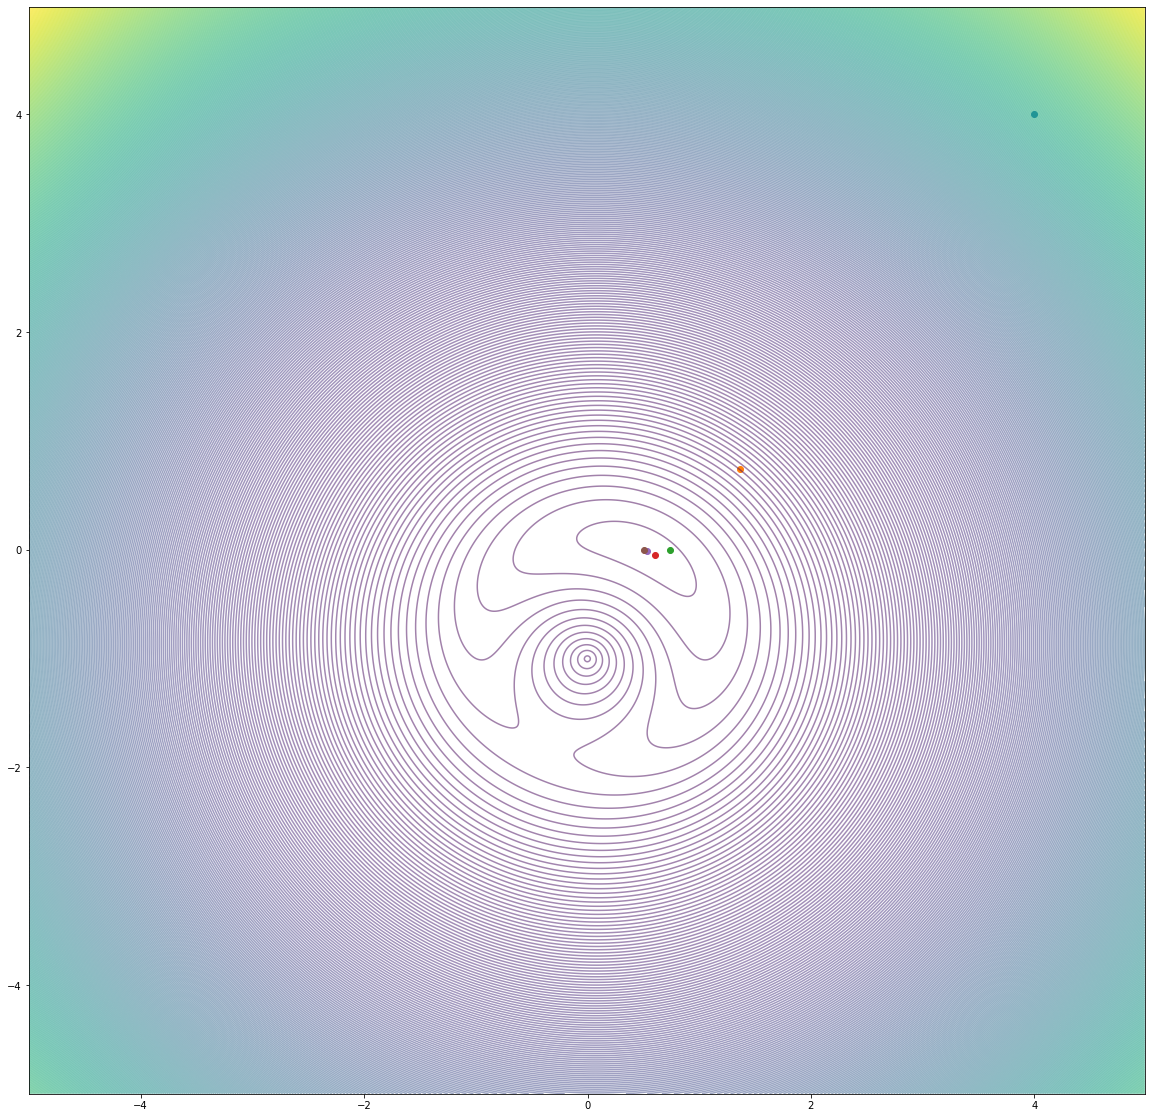

In [20]:
t = time.time()
I=np.identity(2)

fig = plt.figure(figsize=(20,20))
#axis
#ax = fig.add_subplot(projection = '3d')
ax = fig.add_subplot()
surf = ax.contour(x1, x2, z,500, alpha=0.5)

while(True):
    ax.scatter(x[0],x[1])
    G=gradient(x,delta)
    H=Hessian(x,delta)
    S=-np.matmul(np.linalg.inv((H+labda*I)),G)
    x=x+S
    fx=f(x)
    if(fx<fx_prev):
        labda=.5*labda
    else:
        labda=2*labda
        
    if(abs(fx_prev - fx) < epsilon1):
            break;
        
    fx_prev=fx    
    iteracciones+=1
print("Tiempo =",time.time()-t)    
print(x)
print(iteracciones)
print(f(x))

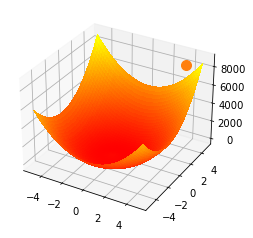

In [16]:
#%matplotlib qt
X1 = np.arange(-5, 5, 0.01)
X2 = np.arange(-5, 5, 0.01)
x1, x2 = np.meshgrid(X1, X2)
z = f([x1,x2])
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(x1, x2, z, cmap=cm.autumn, linewidth=0, antialiased = False)
ax.scatter(x[0], x[1],f(x),s=100) 
ax.scatter(4, 4,f([5,5]),s=100) 
plt.show()




